In [25]:
from git import Repo
import os
import requests

import pandas as pd 
import numpy as np 
import pyarrow.parquet as pq
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
table = pq.read_table('data_granular\gran_data.parquet')
gran_df = table.to_pandas()

In [92]:
gran_df.head()

,donor_id,visit_date,birth_date
0,00000,2013-11-03,1964
1,00000,2014-05-26,1964
2,00000,2015-01-25,1964
3,00000,2015-08-09,1964
4,00000,2016-03-10,1964


In [101]:
#checking null in the dataset
gran_df.isna().sum()

donor_id      0
visit_date    0
birth_date    0
dtype: int64

Theres no null in the dataset

In [10]:
#Check the number of donator in the database
gran_df['donor_id'].nunique()

2244546

In [15]:
gran_df['visit_date'] = pd.to_datetime(gran_df['visit_date'])

In [17]:
sort_gran = gran_df.sort_values(by=['donor_id','visit_date'])

In [71]:
sort_gran['days_between_donations'] = sort_gran.groupby('donor_id')['visit_date'].diff().dt.days
sort_gran['donor_age'] = sort_gran['visit_date'].dt.year-sort_gran['birth_date']
sort_gran

,donor_id,visit_date,birth_date,days_between_donations,days_between_donations_per_56_days,donor_age
0,00000,2013-11-03,1964,NaN,NaN,49
1,00000,2014-05-26,1964,204.0,3.642857,50
2,00000,2015-01-25,1964,244.0,4.357143,51
3,00000,2015-08-09,1964,196.0,3.500000,51
4,00000,2016-03-10,1964,214.0,3.821429,52
...,...,...,...,...,...,...
6237070,09pzv,2024-01-18,2003,NaN,NaN,21
6237075,09pzw,2024-01-18,2002,NaN,NaN,22
6237076,09pzx,2024-01-18,2005,NaN,NaN,19
6237081,09pzy,2024-01-18,1992,NaN,NaN,32


In [81]:
sort_gran[sort_gran['birth_date']<=1920]

,donor_id,visit_date,birth_date,days_between_donations,days_between_donations_per_56_days,donor_age
16140,000L5,2018-06-17,1900,NaN,NaN,118
16141,000L5,2018-12-11,1900,177.0,3.160714,118
5874076,000L5,2023-06-04,1900,1636.0,29.214286,123
61905,002wg,2019-01-15,1900,NaN,NaN,119
61906,002wg,2019-05-13,1900,118.0,2.107143,119
...,...,...,...,...,...,...
5432573,08xn5,2019-01-15,1900,NaN,NaN,119
5440314,08yVg,2018-08-09,1900,NaN,NaN,118
5437717,08yrv,2019-08-22,1901,NaN,NaN,118
5437793,08ysc,2017-10-25,1900,NaN,NaN,117


From the age of the donor, we discovered there might be a data entry problem as there are donor who are more thn 100 years old donating the blood.
Thus we will make the rule to only take donor who are from 18 until 65 years old (the max age of eligible to become blood donors) cite from PPUM website.
https://www.ummc.edu.my/pesakit/blood-CRITERIA.asp?kodBM=#:~:text=Age%3A,donor%3A%2018%2D65%20years%20old

In [82]:
#filter the donor age less or equal to 65
sort_gran_fil = sort_gran[sort_gran['donor_age']<=65]
sort_gran_fil


,donor_id,visit_date,birth_date,days_between_donations,days_between_donations_per_56_days,donor_age
0,00000,2013-11-03,1964,NaN,NaN,49
1,00000,2014-05-26,1964,204.0,3.642857,50
2,00000,2015-01-25,1964,244.0,4.357143,51
3,00000,2015-08-09,1964,196.0,3.500000,51
4,00000,2016-03-10,1964,214.0,3.821429,52
...,...,...,...,...,...,...
6237070,09pzv,2024-01-18,2003,NaN,NaN,21
6237075,09pzw,2024-01-18,2002,NaN,NaN,22
6237076,09pzx,2024-01-18,2005,NaN,NaN,19
6237081,09pzy,2024-01-18,1992,NaN,NaN,32


To show does Malaysia Retain their blood donater, by looking at the frequency of repeated number of donation

In [103]:
#group by donor id to get the number of their donations
donor_donations = sort_gransdasdasd_fil.groupby('donor_id').count().reset_index(name='donation_count')
donor_donations

,visit_date,birth_date,days_between_donations,days_between_donations_per_56_days,donor_age
donor_id,,,,,
00000,11,11,10,10,11
00001,4,4,3,3,4
00002,12,12,11,11,12
00003,5,5,4,4,5
00004,3,3,2,2,3
...,...,...,...,...,...
09pzv,1,1,0,0,1
09pzw,1,1,0,0,1
09pzx,1,1,0,0,1


In [91]:
donor_donations[donor_donations['donation_count']==312]

,donor_id,donation_count
632079,02eRf,312


In [44]:
bins = 30
day_range = max(sort_gran['days_between_donations'].dropna()) - min(sort_gran['days_between_donations'].dropna())
bin_width = day_range / bins


In [45]:
bin_width

146.7

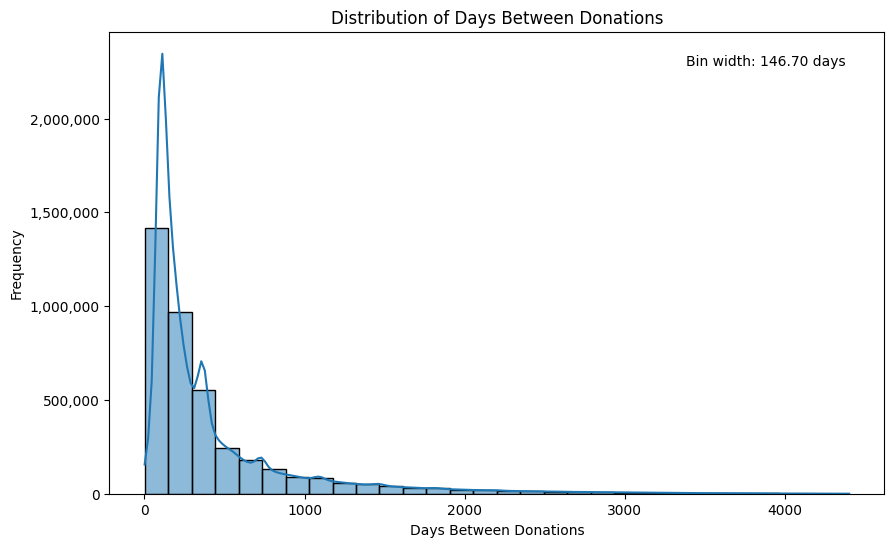

In [46]:
# Plotting the distribution of days between donations
plt.figure(figsize=(10, 6))
ax = sns.histplot(sort_gran['days_between_donations'].dropna(), bins=bins, kde=True)

plt.text(x=0.95, y=0.95, s=f'Bin width: {bin_width:.2f} days',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,  # This makes the positioning relative to the axes
         fontsize=10)

plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Distribution of Days Between Donations')
plt.xlabel('Days Between Donations')
plt.ylabel('Frequency')
plt.show()

In [56]:
# Calculate the mean days between donations for each donor
donor_intervals = sort_gran.groupby('donor_id')['days_between_donations'].mean().reset_index().dropna()
donor_intervals['days_between_donations']

0           249.900000
1           771.333333
2           332.818182
3           799.750000
4          1442.000000
              ...     
2224851       7.000000
2224955      65.000000
2225285      61.000000
2227946      60.000000
2234185       7.000000
Name: days_between_donations, Length: 1075579, dtype: float64

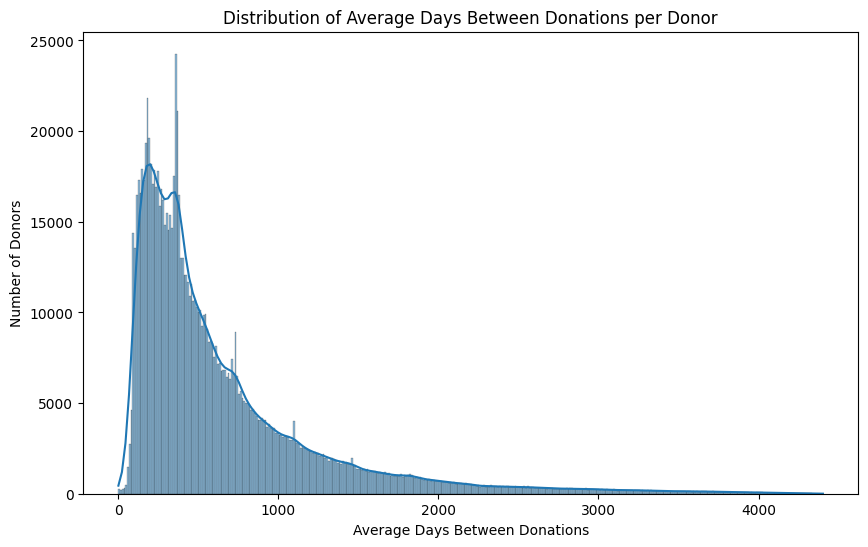

In [63]:
# Now, plot the distribution of average intervals
plt.figure(figsize=(10, 6))
sns.histplot(donor_intervals['days_between_donations'], kde=True)
plt.title('Distribution of Average Days Between Donations per Donor')
plt.xlabel('Average Days Between Donations')
plt.ylabel('Number of Donors')
plt.show()